In [1]:
#author @ Cavin Gada
#dataset @ iris (https://archive.ics.uci.edu/ml/datasets/iris)

""" This project implements the Logistic Regression Classifier by classifying two types of flowers 
(Virginica and Non Virginica) based on two features: sepal width and sepal length. 

I use the sigmoid function for predictions and train my model using gradient (w.r.t bias and weights) descent. 

Finally, I estimate accuracy based on how many predictions my model can get correct and plot the decision boundary 
for the observations to visually represent the accuracy of my model. """ 

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris() 

In [2]:

#data preprocessing
x = iris.data[:,0:2] #we want only 2 features
y = iris.target 

for i in range(len(y)):
    #virginica: 1. non-virginica: 0
    if y[i] == 1:
        y[i] = 0
    if y[i] == 2:
        y[i] = 1

#y must be in matrix format (2d array) for multiplication.
y = y.reshape(x.shape[0],1)


In [3]:
#sigmoid function. Returns value 0 to 1
def sig(n):
    denominator = 1 + np.exp(0-n)
    return 1.0/denominator

#loss function. Didn't use this in training, but I intend to in the future on a project. 
def loss(y, y_pred):
    #negative log-liklihood
    term1 = y*np.log(y_pred)
    term2 = (1-y)*np.log(1-y_pred)
    loss = 0 - np.mean(term1 - term2)
    return loss

#gradient loss w.r.t weight
def gradient_weight(x, y, y_pred):
    #number of training data
    n = x.shape[0]
    #take dot product of x transpose and difference between y and y prediction. Divide this by number of training data
    weight_gradient = (np.dot(np.transpose(x), y_pred-y))/n
    return weight_gradient

#gradient loss w.r.t bias
def gradient_bias(x, y, y_pred):
    #number of training data
    n = x.shape[0]
    #take sum of difference between y pred and y and divide it by amount of training data. 
    bias_gradient = np.sum(y_pred-y)/n
    return bias_gradient


In [4]:
#assume batch number is a factor of amount of training data for simplicity.
def training_func(x, y, epoch_amount, learning_rate, batch_size): 

    #store amount of training samples and features for convenience
    num_training = x.shape[0] 
    num_features = 2

    #we will set weight and bias to 0 (initially). Checked stack overflow and noticed that this is common practice.
    weights = np.zeros((2,1)) # 0 vector to match dimensions of number of features (2) 
    bias = 0

    for i in range(epoch_amount):
        for j in range(num_training//batch_size):
            
            x_batch = x[j * batch_size : j * batch_size + batch_size]
            y_batch = y[j * batch_size : j * batch_size + batch_size]

            # xT * w + b
            classifier = np.dot(x_batch, weights) + bias
            y_pred = sig(classifier)

            # gradient descent
            weight_gradient = gradient_weight(x_batch, y_batch, y_pred)
            bias_gradient = gradient_bias(x_batch, y_batch, y_pred)

            #update weights and bias
            weights = weights - learning_rate * weight_gradient
            bias = bias - learning_rate * bias_gradient

    return weights, bias


    

In [5]:
# predicts the class of given data based on predetermined weights and bias. Returns 1 if probability is >= .5 and 0 otherwise. 
def prediction(test_data, weights, bias):
    classifier = np.dot(test_data, weights) + bias
    my_predictions = sig(classifier)
    results = []
    for prediction in my_predictions:
        if prediction >= 0.5:
            results += [1]
        else:
            results+=[0]
    #need in numpy array format in order to easily check for accuracy later. 
    results_np = np.array(results)
    return results_np

# returns how accurate predictions are by checking what proportion of predictions are right in comparison to the true class for each observation. 
def proportion_correct(y, y_preds):
    numCorrect = 0
    for prediction in y_preds:
        for true_label in y:
            if prediction==true_label:
                numCorrect+=1
    return numCorrect/len(y)/100



In [12]:
#decision boundary is simply xTw + b = 0
def decision_boundary(x, w, b, y):

    #algebraic manipulation to find slope and intercept. 

    #b + w1x1 + w2x2 = 0
    #x2 = (-w1x1 - b)/w2
    #x2 = (-w1/w2)x1 - b/w2
    #slope = -w1/w2 and intercept = -b/w2

    slope = -w[0]/w[1]        #a.k.a -w1/w2. (we're just using indices)
    intercept = -b/w[1]       #a.k.a -b/w2. (we're just using indices)
    p1 = [4, 8.5]             #point 1. Chose this because I know this covers all possible range of x
    p2 = slope*p1 + intercept #point 2. Calculated using simple line formula

    # Here, I show what each point's true class is. This will show how accurate the
    # decision boundry is visually. 

    firstNonVirginica = True
    firstVirginica = True

    for i in range(x.shape[0]):

        #if non virginica, make green
        #we want to label the plot (only if the point being plotted is the first point in that category.)
        #in other words, we do not want duplicate keys in the legend. 
        
        if y[i][0] == 0 and firstNonVirginica:
            plt.plot(x[i][0], x[i][1], "g+", label="non-virginica")
            firstNonVirginica = False

        elif y[i][0] == 0:
            plt.plot(x[i][0], x[i][1], "g+")

        #if virginica, make red
        if y[i][0] == 1 and firstVirginica: 
            plt.plot(x[i][0], x[i][1], "r.", label="virginica")
            firstVirginica = False
        elif y[i][0] == 1: 
            plt.plot(x[i][0], x[i][1], "r.")

    plt.legend()
    plt.plot(p1, p2) #plot the line between both points to achieve the decision boundry.
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Sepal Width (cm)")
    plt.title("Decision Boundary for Virginica and Non-Virginica Classification")




accuracy is: 0.82


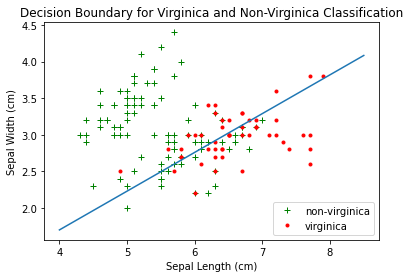

In [13]:
#this cell outputs the final results
weight, bias = training_func(x, y, 1000, 0.01, 50)          #train function
decision_boundary(x, weight, bias, y)                       #plot decision boundry

y_preds = prediction(x,weight,bias)                         #get predictions
print("accuracy is: " + str(proportion_correct(y,y_preds))) #determine accuracy based on predictions